In [3]:
import h5py
from pathlib import Path
import seaborn as sns
#import whirligig
import matplotlib.pyplot as plt
import numpy as np
home = Path.home()

penn_state_data = home/'group'/'project'/'datasets'/'data'/'230412_jugaad_analysis'
cres2_vna = penn_state_data/'211220_cres2_vna_trace.h5'

#jugaad_data = home/'iCloud'/'jugaad_data'/'Characterization'/'data.h5'

def PhaseModel(coordinates, roll=0):

    ant_angles = np.arange(0, 120, 1) * 3
    r_array = 0.1
    wavelength = 3e8 / 25.86e9

    x_array = r_array * np.cos(np.radians(ant_angles))
    y_array = r_array * np.sin(np.radians(ant_angles))
    x_coord, y_coord = coordinates[:, 0], coordinates[:, 1]

    d = np.sqrt(
        (x_array[:, np.newaxis] - x_coord[np.newaxis, :]) ** 2
        + (y_array[:, np.newaxis] - y_coord[np.newaxis, :]) ** 2
        )
    arctan = np.arctan2(
        y_array[:, np.newaxis] - y_coord[np.newaxis, :],
        x_array[:, np.newaxis] - x_coord[np.newaxis, :]
        )

    spatial = 2*np.pi * d / wavelength
    phase = np.unwrap(np.roll(spatial+arctan, roll, axis=0), axis=0)
    phase -= phase[0, :][np.newaxis, :]
    
    return -phase

# Penn State VNA

In [4]:
h5file = h5py.File(cres2_vna, 'r')

In [5]:
h5file.keys()

<KeysViewHDF5 ['range3cm_step1mm_z-10mm', 'range3cm_step1mm_z-5mm', 'range3cm_step1mm_z0mm', 'range3cm_step1mm_z10mm', 'range3cm_step1mm_z5mm']>

In [6]:
h5file['range3cm_step1mm_z0mm'].keys()

<KeysViewHDF5 ['array', 'freq', 'step', 'z']>

In [7]:
data = h5file['range3cm_step1mm_z0mm']['array'][:]
data = data[:, 0:120, :]
data = np.roll(data,33, axis=1)

In [8]:

data.shape

(31, 120, 801)

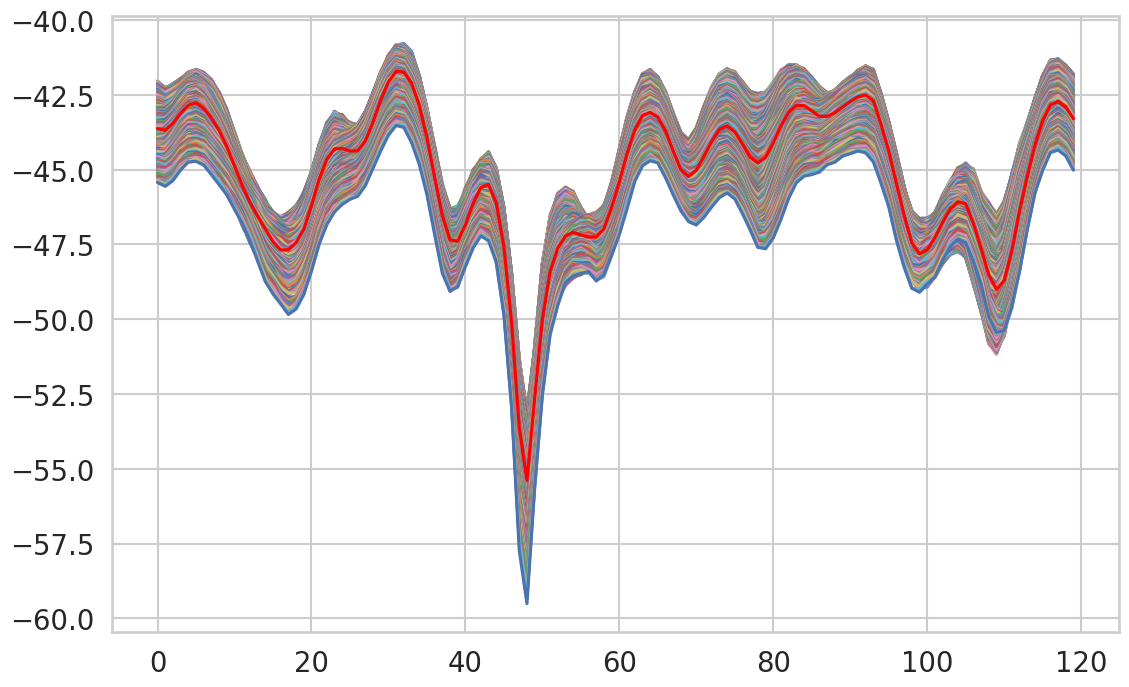

In [9]:
sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

mean_curve_penn_mag = np.zeros(120)
for i in range(data.shape[-1]):
    i_curve = 20 * np.log10(abs(data[0, :, i]))
    ax.plot(i_curve)
    mean_curve_penn_mag += i_curve / data.shape[-1]

ax.plot(mean_curve_penn_mag, color='red')

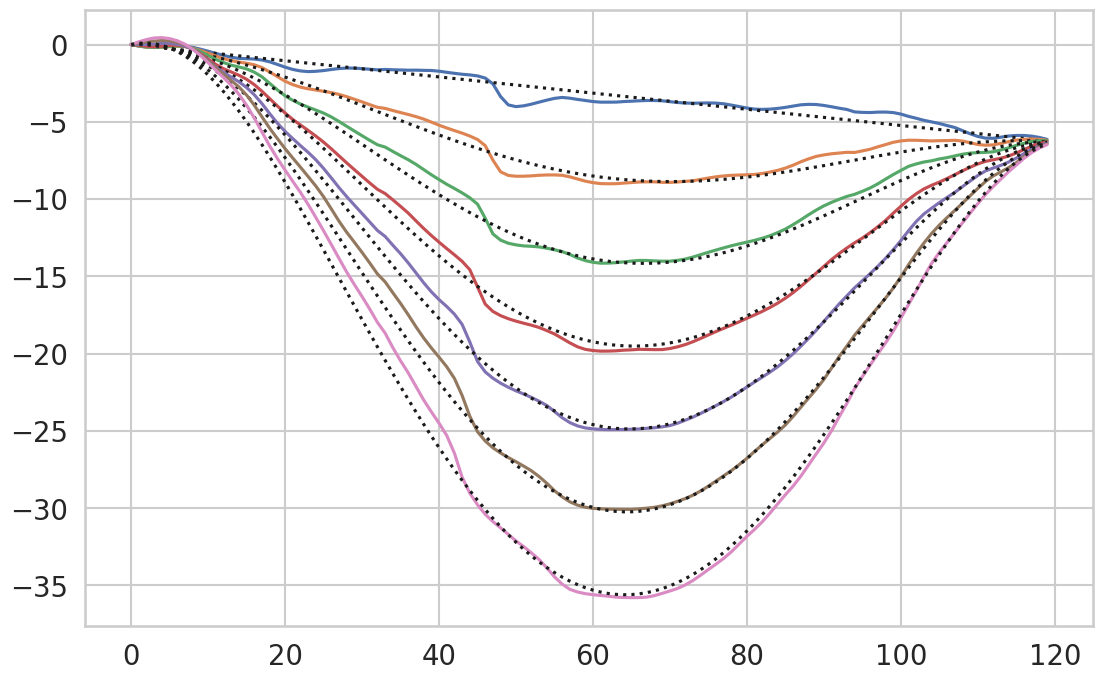

In [10]:
sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

i_freq = 400

for j in np.arange(0,35,5):

    initial_phase = np.angle(data[j, 0, i_freq])
    j_curve = np.unwrap(np.angle(data[j, 0:120, i_freq]))-initial_phase
    
    x_array = np.array([j*0.001,])
    y_array = np.array([0,])
    coordinates = np.array([x_array, y_array]).T
    model_phase = PhaseModel(coordinates, roll = 3)[:, 0]
    ax.plot(j_curve)
    ax.plot(model_phase, ls=':', color='k')
    


# compare phase model to VNA data

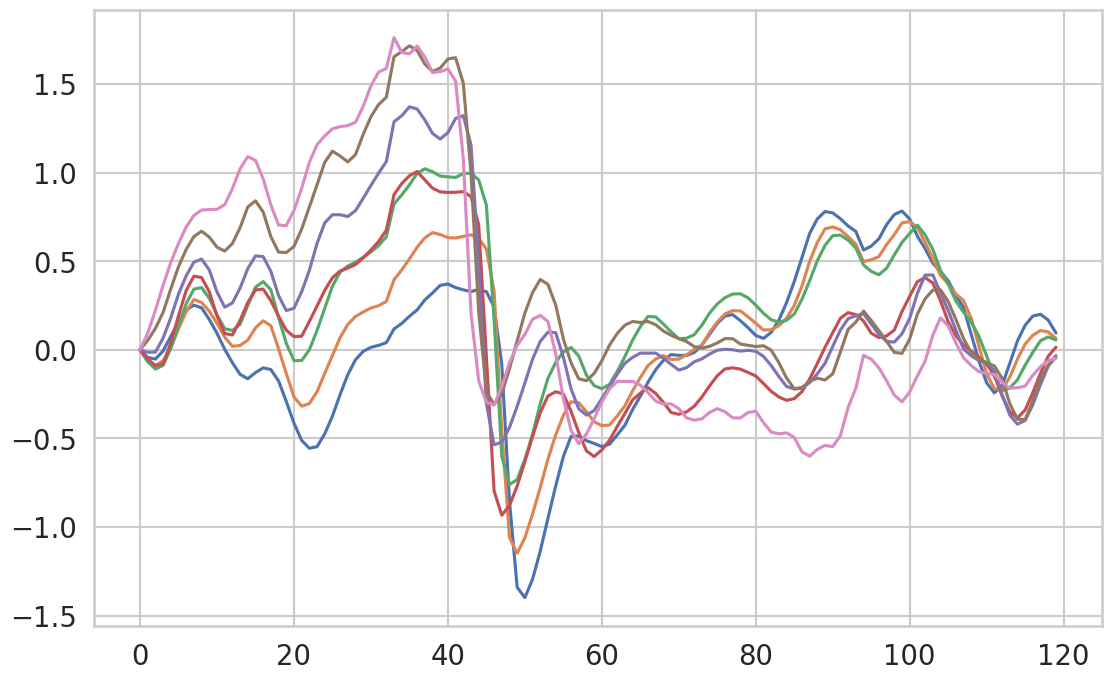

In [11]:
sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

i_freq = 400

for j in np.arange(0,35,5):

    initial_phase = np.angle(data[j, 0, i_freq])
    j_curve = np.unwrap(np.angle(data[j, 0:120, i_freq]))-initial_phase
    
    x_array = np.array([j*0.001,])
    y_array = np.array([0,])
    coordinates = np.array([x_array, y_array]).T
    model_phase = PhaseModel(coordinates, roll = 3)[:,0]
    ax.plot(j_curve-model_phase)
    #ax.plot(model_phase, ls=':', color='k')
    


# make image

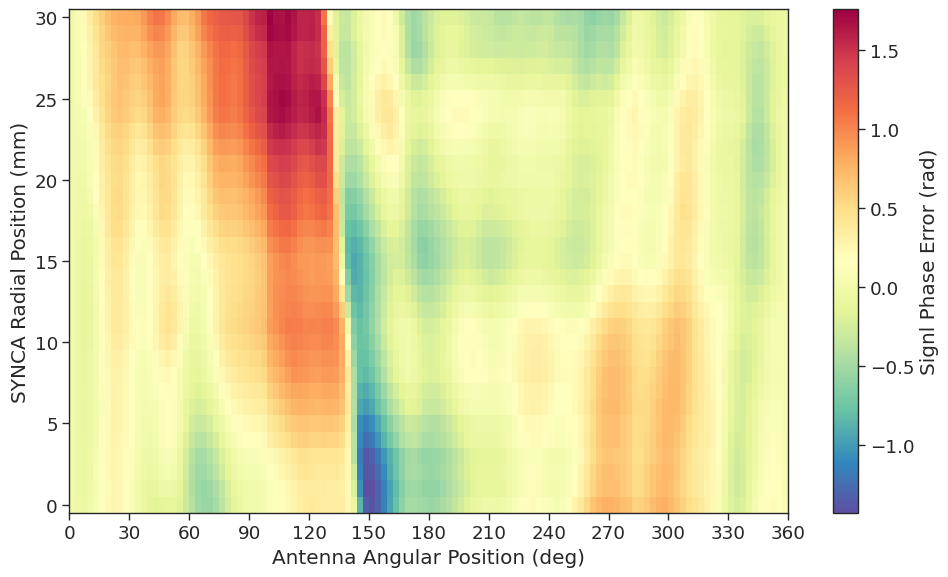

In [18]:
sns.set_theme(style='ticks', context='paper', font_scale=1.5)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1,1,1)


image = np.zeros((31, 120))

i_freq = 400

for j in np.arange(0,31,1):

    initial_phase = np.angle(data[j, 0, i_freq])
    j_curve = np.unwrap(np.angle(data[j, 0:120, i_freq]))-initial_phase
    x_array = np.array([j*0.001,])
    y_array = np.array([0,])
    coordinates = np.array([x_array, y_array]).T
    model_phase = PhaseModel(coordinates, roll = 3)[:,0]
    image[j, :] = j_curve - model_phase
    #ax.plot(model_phase, ls=':', color='k')

    
img = ax.imshow(
    np.flip(image, axis=0), 
    aspect='auto',
    cmap='Spectral_r',
    extent = (0,360,0,30)
)
cbar = fig.colorbar(img, label='Signl Phase Error (rad)')

ticks = ax.set_yticks(np.linspace(0.5,29.5,7))
ax.set_yticklabels(np.arange(0,35,5))
ticks = ax.set_xticks(np.linspace(0, 360, 13))

ax.set_xlabel('Antenna Angular Position (deg)')
ax.set_ylabel('SYNCA Radial Position (mm)')
plt.tight_layout(pad=1.05)

plt.savefig(Path.home()/'group'/'project'/'plots'/'230925_phase_error_using_horn_antenna', dpi=150)

# JUGAAD

In [209]:
jugaadfile = h5py.File(jugaad_data, 'r')
print(jugaadfile.keys())

<KeysViewHDF5 ['frequency', 'r00z00', 'r00z05', 'r00z10', 'r00z15', 'r00z20', 'r00z25', 'r00z30', 'r00z35', 'r00z40', 'r00z45', 'r00z50', 'r05z00', 'r05z05', 'r05z10', 'r05z15', 'r05z20', 'r05z25', 'r05z30', 'r05z35', 'r05z40', 'r05z45', 'r05z50', 'r10z00', 'r10z05', 'r10z10', 'r10z15', 'r10z20', 'r10z25', 'r10z30', 'r10z35', 'r10z40', 'r10z45', 'r10z50', 'r15z00', 'r15z05', 'r15z10', 'r15z15', 'r15z20', 'r15z25', 'r15z30', 'r15z35', 'r15z40', 'r15z45', 'r15z50', 'r20z00', 'r20z05', 'r20z10', 'r20z15', 'r20z20', 'r20z25', 'r20z30', 'r20z35', 'r20z40', 'r20z45', 'r20z50', 'r25z00', 'r25z05', 'r25z10', 'r25z15', 'r25z20', 'r25z25', 'r25z30', 'r25z35', 'r25z40', 'r25z45', 'r25z50', 'r30z00', 'r30z05', 'r30z10', 'r30z15', 'r30z20', 'r30z25', 'r30z30', 'r30z35', 'r30z40', 'r30z45', 'r30z50', 'r35z00', 'r35z05', 'r35z10', 'r35z15', 'r35z20', 'r35z25', 'r35z30', 'r35z35', 'r35z40', 'r35z45', 'r35z50', 'r40z00', 'r40z05', 'r40z10', 'r40z15', 'r40z20', 'r40z25', 'r40z30', 'r40z35', 'r40z40', 'r

In [210]:
jugaad_data = jugaadfile['r00z00']
print(jugaad_data.shape)

(60, 141, 2, 2)


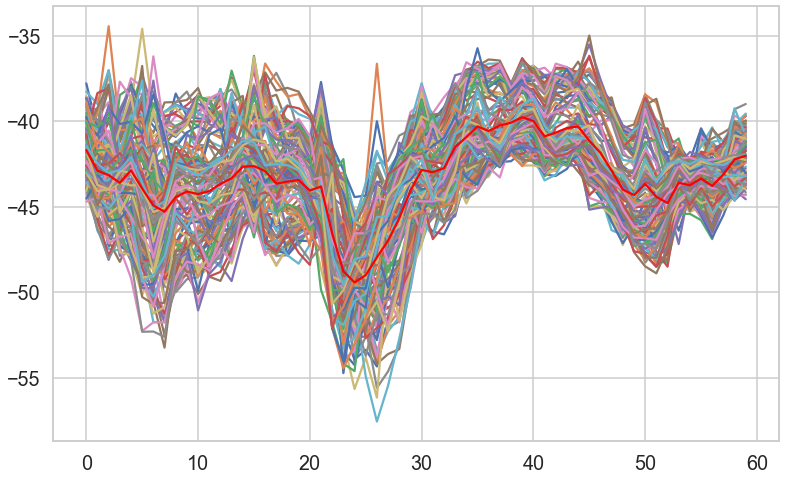

In [211]:
sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

mean_curve_jugaad_mag = np.zeros(60)
for i in range(data.shape[1]):
    i_curve = 20 * np.log10(abs(jugaad_data[:, i, 1, 0]))
    ax.plot(i_curve)
    mean_curve_jugaad_mag += i_curve / data.shape[1]
    
ax.plot(mean_curve_jugaad_mag, color='red')

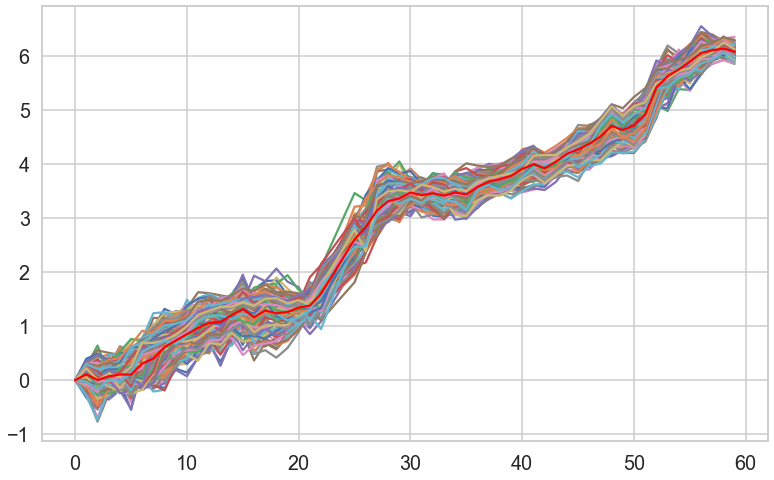

In [212]:
sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)


mask = np.ones(60, dtype=bool)
inds = np.arange(0, 60)
mask[23:25]=0
#print(mask)
mean_curve_jugaad = np.zeros(60)
for i in range(data.shape[1]):
    initial_phase = np.angle(jugaad_data[0, i, 1, 0])
    i_curve = np.unwrap(np.angle(jugaad_data[:, i, 1, 0]))-initial_phase
    
    wrap_phase_ind = 0
    for j in range(i_curve[mask].size):
        #print(i_curve[mask][j])
        if i_curve[mask][j]<-1:
            wrap_phase_ind = j
            break
    #print(wrap_phase_ind)
    phase_wrap = np.zeros(60)
    if wrap_phase_ind != 0:
        phase_wrap[j:]+=2*np.pi
    
    ax.plot(inds[mask], i_curve[mask] + phase_wrap[mask])
    mean_curve_jugaad[mask] += (i_curve[mask] + phase_wrap[mask]) / data.shape[1]
    
ax.plot(inds[mask], mean_curve_jugaad[mask], color='red')


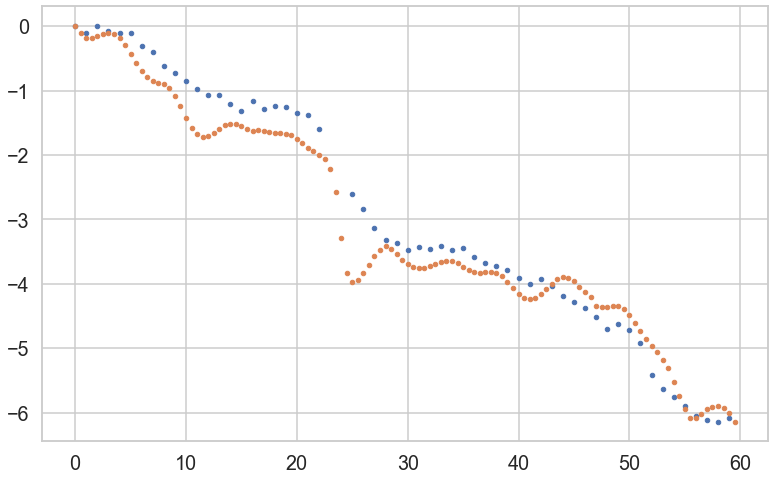

In [213]:
sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

inds = np.arange(0, 60, 1)
ax.plot(inds[mask], -mean_curve_jugaad[mask], '.')
inds = np.arange(0, 60, 0.5)
ax.plot(inds, mean_curve_penn, '.')

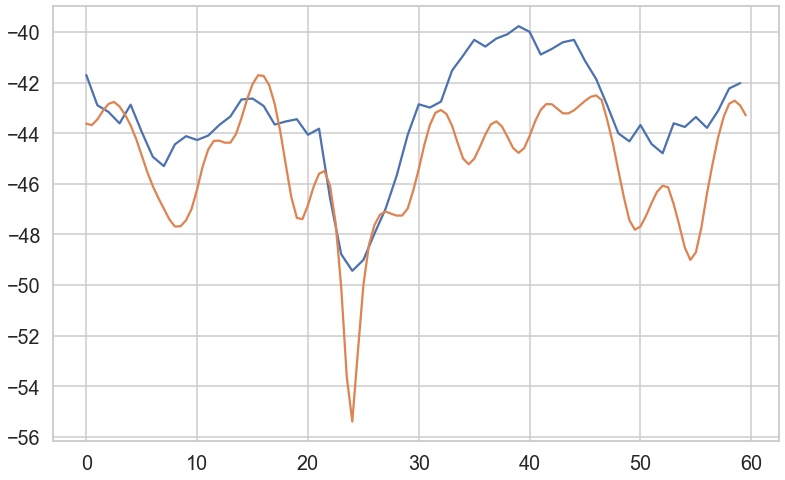

In [214]:
sns.set_theme(style='whitegrid', context='talk', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

inds = np.arange(0, 60, 1)
ax.plot(inds, mean_curve_jugaad_mag,)
inds = np.arange(0, 60, 0.5)
ax.plot(inds, mean_curve_penn_mag,)